In [1]:
from sklearn.datasets import load_wine
import numpy as np
dataset = load_wine()
X=dataset["data"]  # type: ignore
Y=dataset["target"] # type: ignore

In [2]:
feature_names = dataset["feature_names"]
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [3]:
X.shape

(178, 13)

In [4]:
Y.shape

(178,)

In [5]:
len(feature_names)

13

In [6]:
np.isnan(X).sum()


0

In [7]:
classes = np.unique(Y)
for c in classes:
    count = np.count_nonzero(Y == c)
    print(f"In class {c} there are {count}")

In class 0 there are 59
In class 1 there are 71
In class 2 there are 48


In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X,Y)

DecisionTreeClassifier()

In [9]:
#%pip install pydot

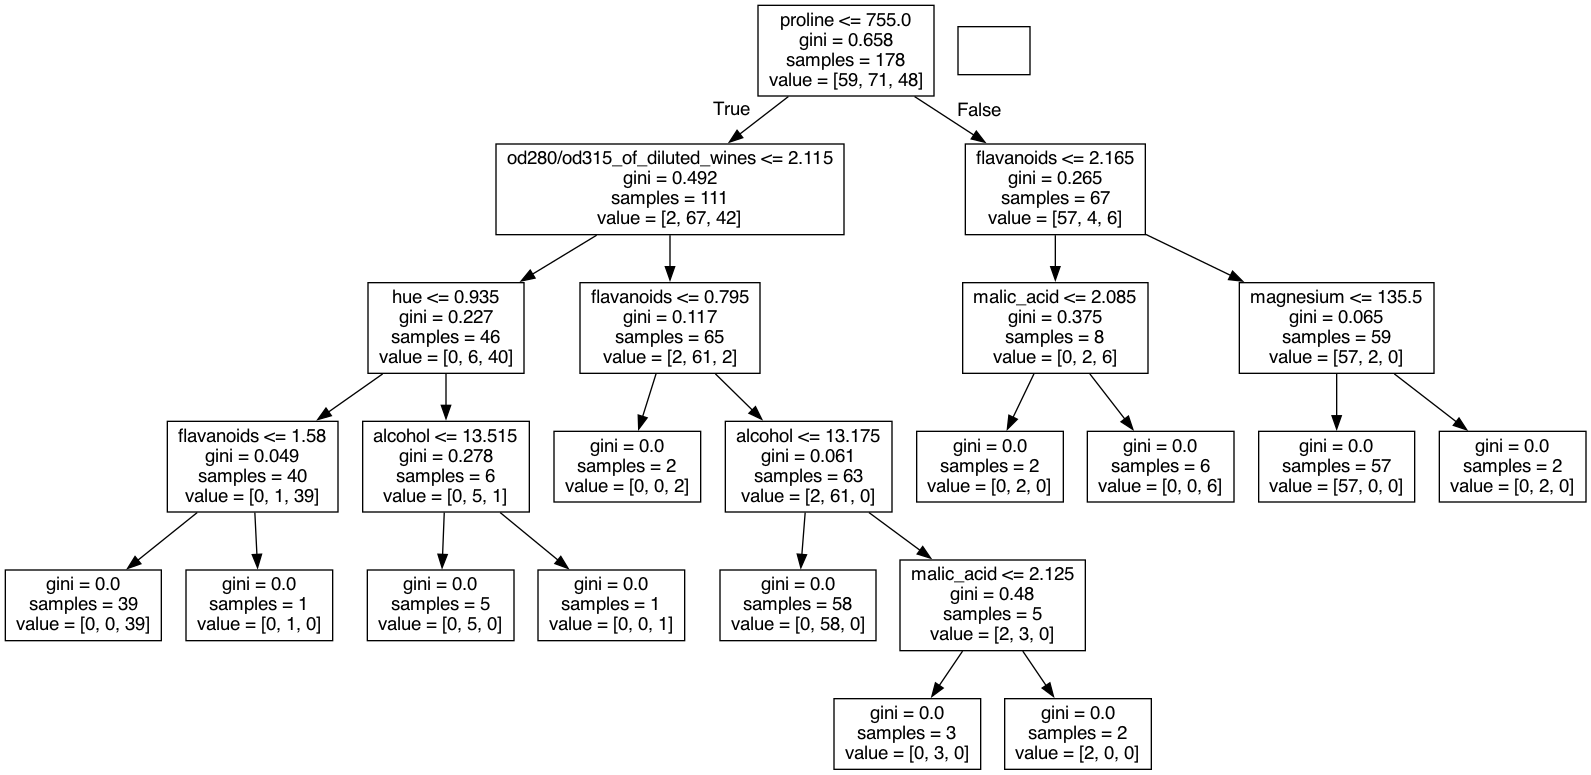

In [10]:

import pydot
from IPython.display import Image
import graphviz
from sklearn.tree import plot_tree, export_graphviz

# First plotting method
dot_code = export_graphviz(clf, feature_names=feature_names)
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

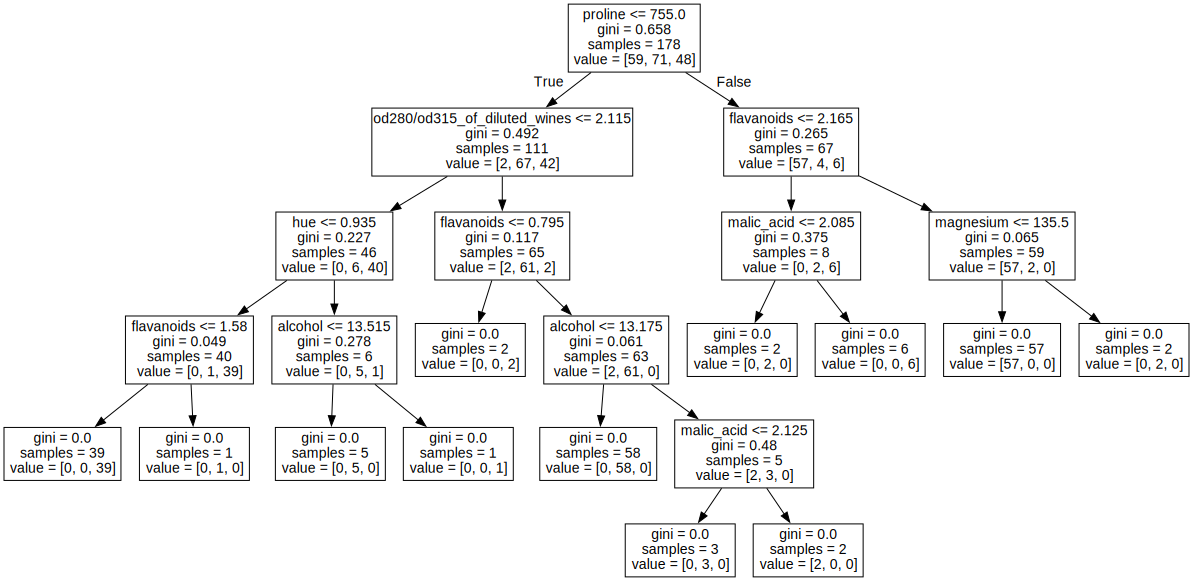

In [11]:
from graphviz import Source
from sklearn import tree

# Second plotting method
Source(tree.export_graphviz(clf, out_file=None, feature_names=feature_names))

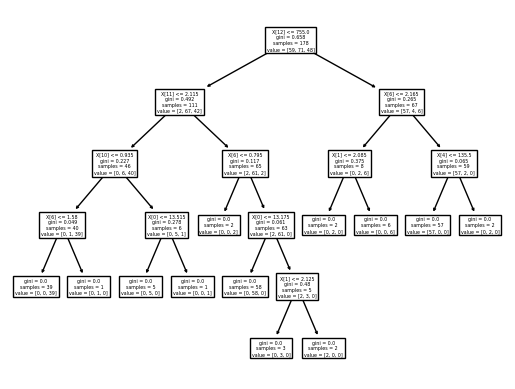

In [12]:
# Third plotting method
plot = plot_tree(clf)

In [13]:
# POINT 4
y_pred = clf.predict(X)

from sklearn.metrics import accuracy_score

accuracy_score(Y, y_pred)

1.0

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=.8 )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape  ) # type: ignore 

(142, 13) (36, 13) (142,) (36,)


In [15]:
clf_tts = DecisionTreeClassifier()
clf_tts.fit(X_train, y_train)
y_pred_tts = clf_tts.predict(X_test)
accuracy_score(y_test, y_pred_tts)

0.8888888888888888

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
print(f"Precision score: {precision_score(y_test, y_pred_tts, average=None)}")
print(f"Recall score: {recall_score(y_test, y_pred_tts, average=None)}")
print(f"f1 score: {f1_score(y_test, y_pred_tts, average=None)}")  # type: ignore


print(classification_report(y_test, y_pred_tts))


Precision score: [1.         0.875      0.81818182]
Recall score: [0.81818182 0.875      1.        ]
f1 score: [0.9   0.875 0.9  ]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.88      0.88      0.88        16
           2       0.82      1.00      0.90         9

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.90      0.89      0.89        36



In [17]:
from sklearn.model_selection import ParameterGrid
params = {
    "max_depth": [None, 2, 4, 8],
    "splitter": ["best", "random"],
    "criterion": ["gini", "entropy", "log_loss"],
    "min_samples_split": [2,3]
}
classifiers = []
accs = []
for i, config in enumerate(ParameterGrid(params)):
    new_clf = DecisionTreeClassifier(**config)
    new_clf.fit(X_train, y_train)
    y_pred = new_clf.predict(X_test)  
    print(f"Classifier {i}: ", end="")
    #print(f"Config: {config} \n{classification_report(y_test, y_pred)}")
    acc = accuracy_score(y_test, y_pred)
    print(f"Acc: {acc}, Config: {config}")
    classifiers.append(new_clf)
    accs.append(acc)

index_best_clf = np.array(accs).argmax()
best_clf = classifiers[index_best_clf]
print(f"Best classifier is the classifier {index_best_clf} with hyperparams: {ParameterGrid(params)[index_best_clf]} and accuracy: {accs[index_best_clf]}")

    

Classifier 0: Acc: 0.9166666666666666, Config: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'}
Classifier 1: Acc: 0.9444444444444444, Config: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'random'}
Classifier 2: Acc: 0.9166666666666666, Config: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 3, 'splitter': 'best'}
Classifier 3: Acc: 0.9722222222222222, Config: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 3, 'splitter': 'random'}
Classifier 4: Acc: 0.8888888888888888, Config: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2, 'splitter': 'best'}
Classifier 5: Acc: 0.6944444444444444, Config: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2, 'splitter': 'random'}
Classifier 6: Acc: 0.8888888888888888, Config: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 3, 'splitter': 'best'}
Classifier 7: Acc: 0.8611111111111112, Config: {'criterion': 'gini', 'max_depth

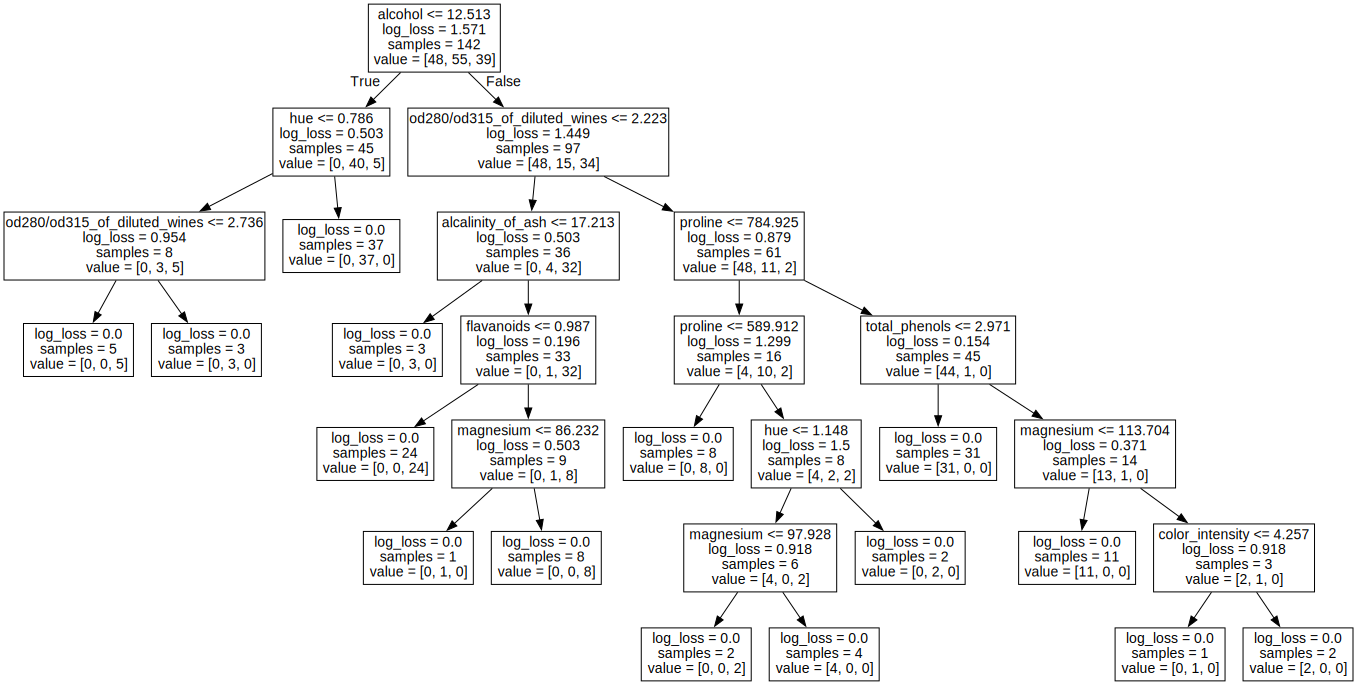

In [18]:
Source(tree.export_graphviz(best_clf, out_file=None, feature_names=feature_names))  # type: ignore

Classifier 0: Average Accuracy of 0-classifier: 0.8507122507122509. Config: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'}
Classifier 1: Average Accuracy of 1-classifier: 0.8733618233618234. Config: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'random'}
Classifier 2: Average Accuracy of 2-classifier: 0.8608736942070278. Config: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 3, 'splitter': 'best'}
Classifier 3: Average Accuracy of 3-classifier: 0.8523504273504272. Config: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 3, 'splitter': 'random'}
Classifier 4: Average Accuracy of 4-classifier: 0.8503703703703706. Config: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2, 'splitter': 'best'}
Classifier 5: Average Accuracy of 5-classifier: 0.8415004748338082. Config: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2, 'splitter': 'random'}
Classifier 6: Average Accuracy of 

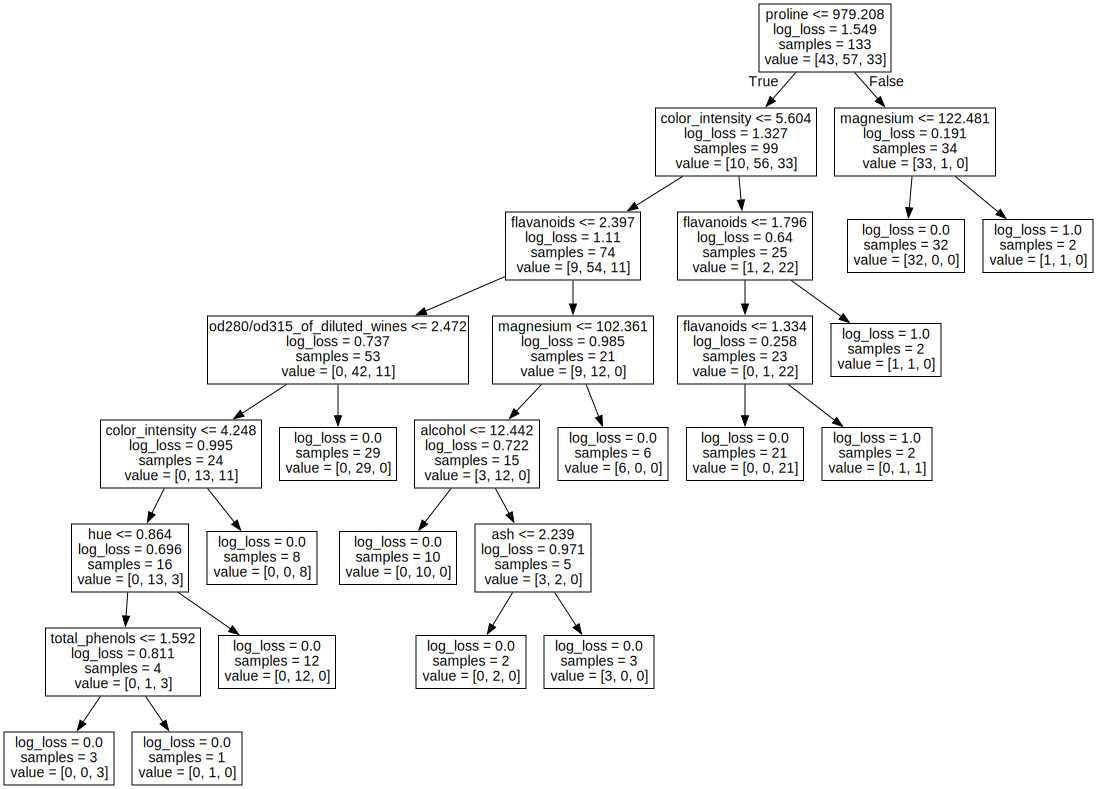

In [19]:
from sklearn.model_selection import KFold
# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, Y)
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split
local_accuracy = []
classifiers = []
accs = []

params = {
    "max_depth": [None, 2, 4, 8],
    "splitter": ["best", "random"],
    "criterion": ["gini", "entropy", "log_loss"],
    "min_samples_split": [2,3]
}

for i, config in enumerate(ParameterGrid(params)):
    clf = DecisionTreeClassifier(**config)
    print(f"Classifier {i}: ", end="")
    classifiers.append(new_clf)
    for train_indices, validation_indices in kf.split(X_train_valid):
        X_train = X_train_valid[train_indices]
        X_valid = X_train_valid[validation_indices]
        y_train = y_train_valid[train_indices]
        y_valid = y_train_valid[validation_indices]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_pred)
        local_accuracy.append(acc)
    
    avg = np.array(local_accuracy).mean()
    print(f"Average Accuracy of {i}-classifier: {avg}. Config: {config}")
    accs.append(avg)


i_best = np.array(accs).argmax()
best_k_clf = classifiers[i_best]
classifiers[i_best].fit(X_train_valid, y_train_valid)

pred = best_k_clf.predict(X_test)
print(f"Accuracy on new data of Best Classifier ({i_best}): {accuracy_score(y_test, pred)}")
Source(tree.export_graphviz(best_k_clf, out_file=None, feature_names=feature_names))  # type: ignore
